<a href="https://colab.research.google.com/github/ArcherOO7/GDG-Project/blob/main/TASK%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install aleatory


## Definition

The Vasicek model specifies that the instantaneous interest rate is defined by a stochastic process which can be defined by the following Stochastic Differential Equation (SDE)


\begin{equation}
dX_t = \theta (\mu - X_t) dt + \sigma dW_t, \quad t >0,
\end{equation}


with initial condition  $X_0 =x_0\in\mathbb{R}$, and where $W_t$ is a standard Brownian motion, and the three parameters are constants:

- $\theta>0$ : speed or mean reversion coefficient
- $\mu \in \mathbb{R}$ : long term mean
- $\sigma>0$ : volatility



In order to find the solution to this SDE, let us set the function $f(t,x) = x e^{\theta t}$. Then, Ito's formula implies


\begin{align*}
X_te^{\theta t} &= x_0 +\int_0^t X_s \theta e^{\theta s}ds + \int_0^t e^{\theta s}dX_s \\
& = x_0 + \int_0^t \left[ \theta X_s  e^{\theta s}  +\theta e^{\theta s}(\mu - X_s)\right] ds + \int_0^t e^{\theta s}\sigma dW_s\\
& = x_0 + \int_0^t \left[ \theta e^{\theta s}\mu\right] ds + \int_0^t e^{\theta s}\sigma dW_s\\
& = x_0 + \mu(e^{\theta t} - 1) + \int_0^t e^{\theta s}\sigma dW_s.
\end{align*}


Thus

\begin{equation}
X_t = x_0e^{-\theta t} +  \mu(1- e^{-\theta t})  + \sigma \int_0^t e^{-\theta (t-s)}dW_s.
\end{equation}

### Expectation and Variance

For each $t>0$, the conditional marginal $X_t|X_0$ from a Vacisek process satisfies

\begin{equation*}
\mathbf{E} [X_t ] = \mathbb{E}[X_t|X_0] = x_0e^{-\theta t} +  \mu(1- e^{-\theta t}),
\end{equation*}

and

\begin{equation*}
\mathbf{Var} [X_t ] = \mathbb{Var} [X_t |X_0] =  \frac{\sigma^2}{ 2\theta} (1- e^{-2\theta t}).
\end{equation*}

To obtain the expectation we simply use the linearity of the expectation and the fact that the Ito integral in equation (2) is a martingale. Similarly, for the variance we  use basic properties of the variance and the isometry property of the Ito integral.

### Python Implementation

So, for given $x_0, \theta>0, \mu, \sigma>0$ and $t,s>0$ You will implement the above formulas for the expectation, variance, and covariance as follows.

Expectation at t=10.0: 5.0
Variance at t=10.0: 0.9999546000702375
Covariance between s=2.0 and t=10.0: 0.01583688671206782


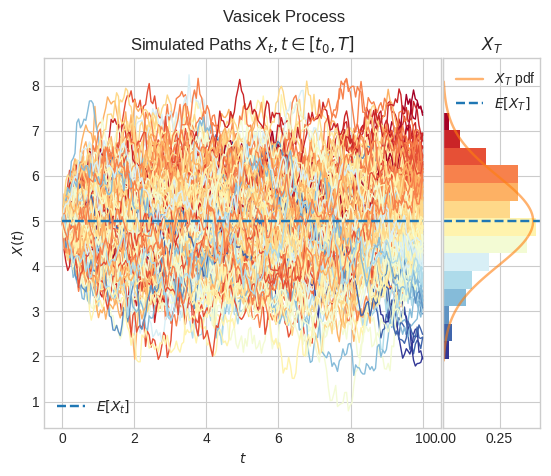

In [13]:
import numpy as np
from aleatory.processes import Vasicek

def vasicek_expectation(x0, theta, mu, t):
  return x0 * np.exp(-theta * t) + mu * (1 - np.exp(-theta * t))

def vasicek_variance(theta, sigma, t):
  return (sigma**2) / (2 * theta) * (1 - np.exp(-2 * theta * t))

def vasicek_covariance(x0, theta, sigma, t, s):
  if s > t:
    t, s = s, t
  return (sigma**2) / (2 * theta) * (np.exp(-theta * (t-s)) - np.exp(-theta * (t + s)))

THETA=0.5
MU=5.0
SIGMA=1.0
INITIAL=5.0
TIME=10.0
s = 2.0


expectation = vasicek_expectation(INITIAL, THETA, MU, TIME)
variance = vasicek_variance(THETA, SIGMA, TIME)
covariance = vasicek_covariance(INITIAL, THETA, SIGMA, TIME, s)

print(f"Expectation at t={TIME}: {expectation}")
print(f"Variance at t={TIME}: {variance}")
print(f"Covariance between s={s} and t={TIME}: {covariance}")


process = Vasicek(theta=THETA, mu=MU, sigma=SIGMA, initial=INITIAL, T=TIME)
process.draw(n=200, N=200, envelope=False, title='Vasicek Process')
import matplotlib.pyplot as plt
plt.show()

### Marginal Distributions in Python

Knowing the distribution –with its corresponding parameters– of the marginal distributions allows us to reproduce them with `Python`.

One way to do this is by using the object  `norm`  from the library `scipy.stats`.  The next cell shows how to create $X_1$ using this method.

In [5]:
from scipy.stats import norm
import numpy as np

### Probability Density Functions

The probability density function (pdf) of the marginal distribution $X_t$ is given by the following expression
\begin{equation*}
f(x, t; \theta,  \mu, \sigma, x_0) = \dfrac{1}{ \frac{\sigma}{ \sqrt{2\theta}}  \sqrt{ (1- e^{-2\theta t})} \sqrt{2 \pi }}\exp\left\{ -\dfrac{1}{2} \left(\dfrac{x- [x_0e^{-\theta t} +  \mu(1- e^{-\theta t})] }{ \frac{\sigma}{ \sqrt{2\theta}}  \sqrt{ (1- e^{-2\theta t})}}\right)^2  \right\}, \qquad \forall x\in\mathbb{R}, t>0.
\end{equation*}

First we consider the process
`Vasicek(theta=1.0, mu=10.0, sigma=0.5, initial=1.0)` and plot the marginal density of $X_1$.
Note that the mean is still far from the long term mean $\mu=10$. Code it and plot the Graph of Distribution
'''
process = Vasicek(theta=1.0, mu=10.0, sigma=0.5, initial=1.0)
X_1 = process.get_marginal(t=1)
''''

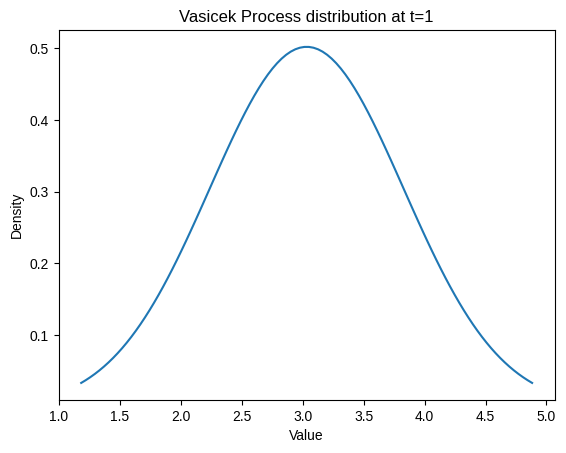

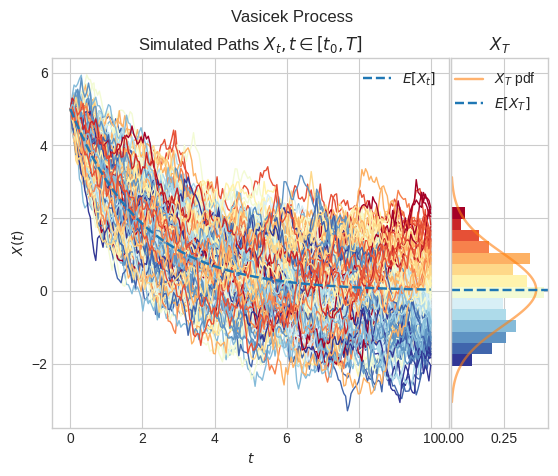

In [31]:
import matplotlib.pyplot as plt
import numpy as np

THETA=0.5
MU=0.0
SIGMA=1.0
INITIAL=5.0
TIME=10.0
s = 2.0

process = Vasicek(theta=THETA, mu=MU, sigma=SIGMA, initial=INITIAL, T=TIME)
X_1 = process.get_marginal(t=1)
# X_1 = process.get_marginal(t=1)
x_values = np.linspace(X_1.ppf(0.01), X_1.ppf(0.99), 100)
y_values = X_1.pdf(x_values)
plt.plot(x_values,y_values,label='distribution at t=1')
plt.title("Vasicek Process distribution at t=1")
plt.xlabel('Value')
plt.ylabel('Density')
# path = process.simulate(n=1000, N=1)
# ts = process.times
# pdf_values = X_1.pdf(ts)
# exp = process.marginal_expectation(ts)
# plt.plot(ts, pdf_values, label= f'$x_0$ = 0, $\mu$ = -10')
process.draw(n=200, N=200, envelope=False, title='Vasicek Process')
plt.show()

**Plot Graphs** Dsitrbution in which Vary one at time ( sigma,mu,theta ,t ) . Vary one value taking  initial values of sigma,mu,theta,t

In [41]:
THETA=1
MU=10
SIGMA=0.5
INITIAL=1
TIME=5

x_range = np.linspace(-2, 15, 1000)

def vasicek_pdf(x, x0, theta, mu, sigma, t):
    mean_Xt = x0 * np.exp(-theta * t) + mu * (1 - np.exp(-theta * t))
    var_Xt = (sigma**2 / (2 * theta)) * (1 - np.exp(-2 * theta * t))
    std_Xt = np.sqrt(var_Xt)
    return norm.pdf(x, loc=mean_Xt, scale=std_Xt)

# Plotting Function
def plot_varying_parameter(parameter_name, delta, fixed_params):
    plt.figure(figsize=(10, 6))
    for value in [-delta, 0, delta]:
        params = fixed_params.copy()
        params[parameter_name]*=(1+value)
        pdf = vasicek_pdf(x_range, **params)
        plt.plot(x_range, pdf, label=f"{parameter_name} = {params[parameter_name]}")

    plt.title(f"Varying {parameter_name.capitalize()} in Vasicek Process", fontsize=14)
    plt.xlabel("$x$", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)


# Fixed parameters
fixed_params = {
    "x0": INITIAL,
    "theta": THETA,
    "mu": MU,
    "sigma": SIGMA,
    "t": TIME,
}

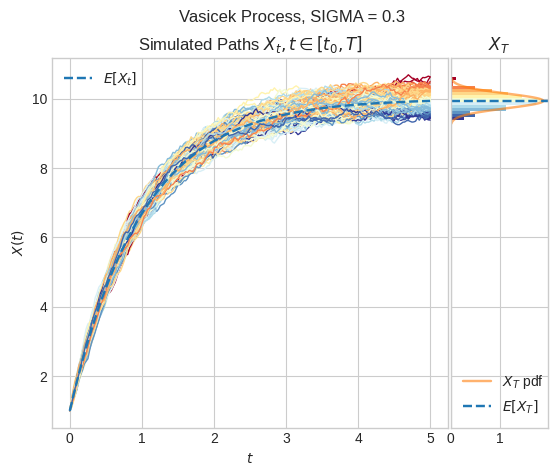

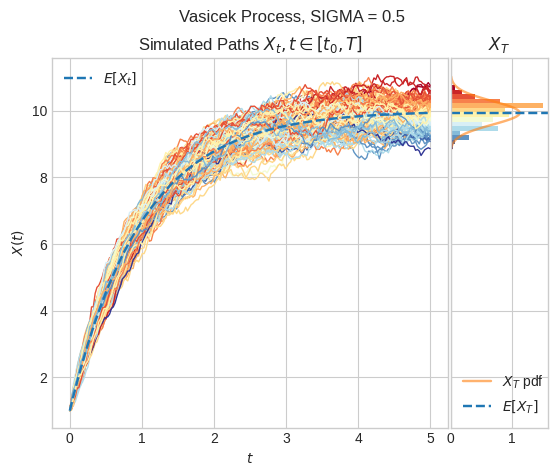

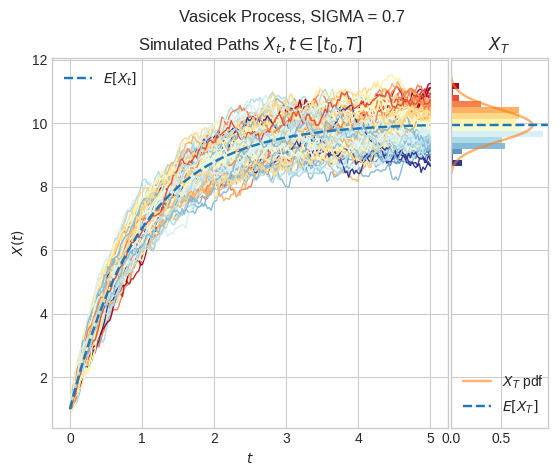

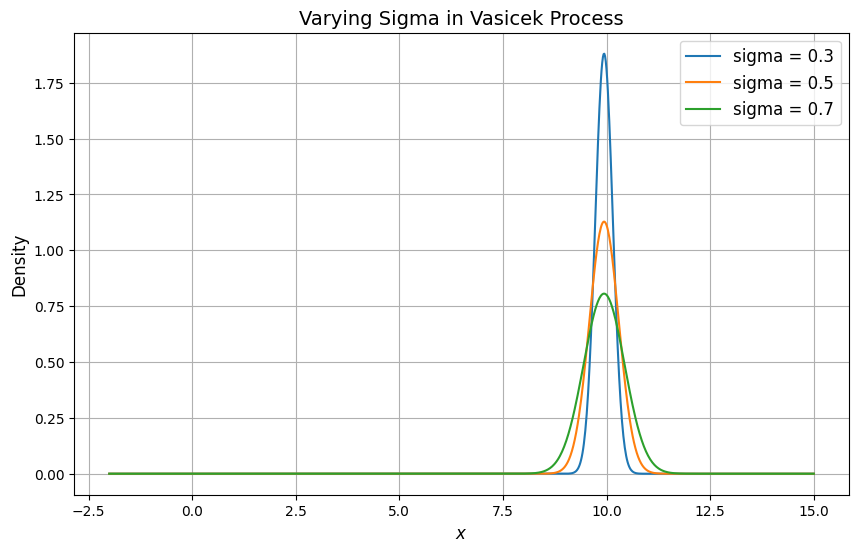

In [42]:
# THETA=1
# MU=10
# SIGMA=0.5
# INITIAL=1
# TIME=5
delt=0.4

for new in [SIGMA-SIGMA*delt, SIGMA, SIGMA+SIGMA*delt]:
    process = Vasicek(theta=THETA, mu=MU, sigma=new, initial=INITIAL, T=TIME)
    process.draw(n=200, N=200, envelope=False, title=f'Vasicek Process, SIGMA = {new}')

plot_varying_parameter("sigma", delt, fixed_params)
plt.show()


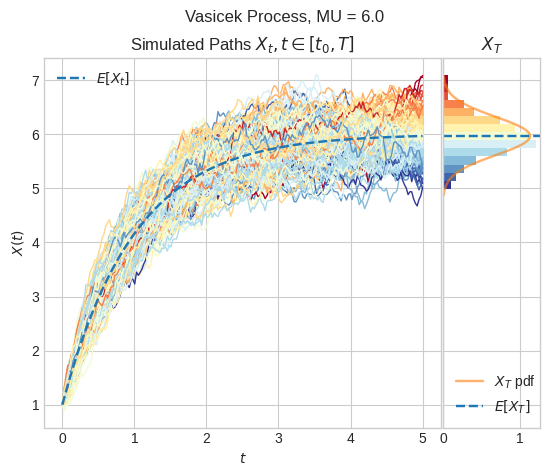

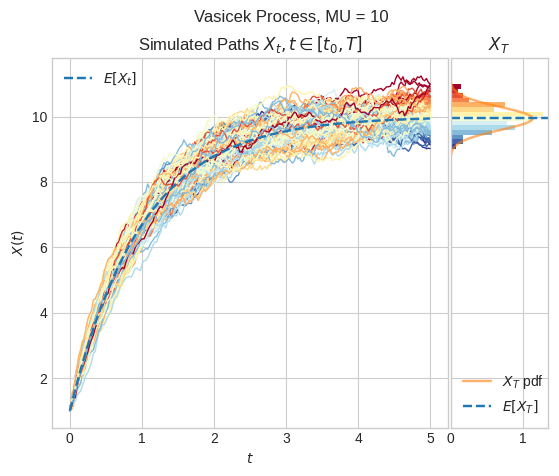

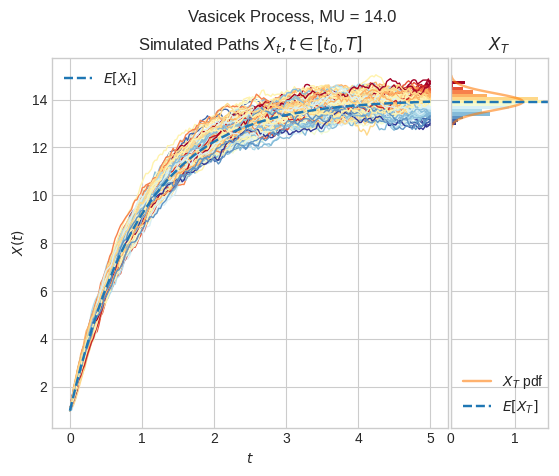

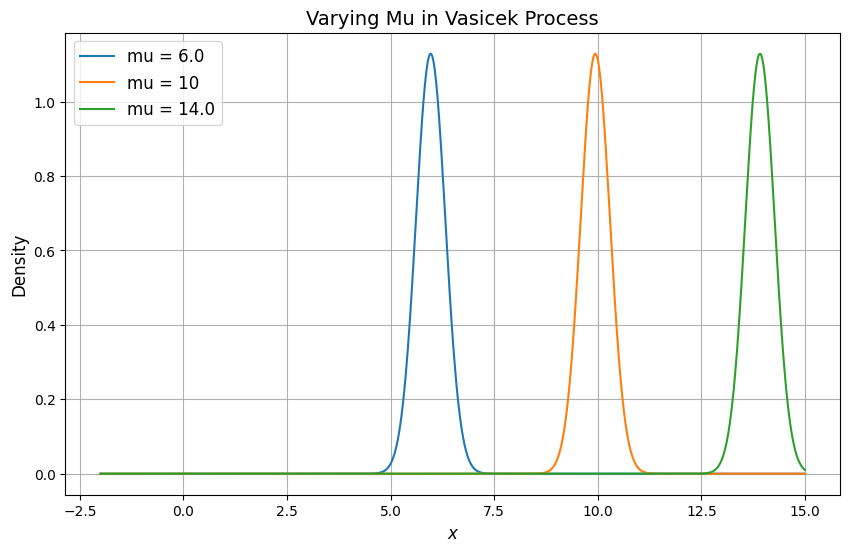

In [47]:
# THETA=1
# MU=10
# SIGMA=0.5
# INITIAL=1
# TIME=5
delt=0.4

for new in [MU-MU*delt, MU, MU+MU*delt]:
    process = Vasicek(theta=THETA, mu=new, sigma=SIGMA, initial=INITIAL, T=TIME)
    process.draw(n=200, N=200, envelope=False, title=f'Vasicek Process, MU = {new}')
plot_varying_parameter("mu", delt, fixed_params)
plt.show()


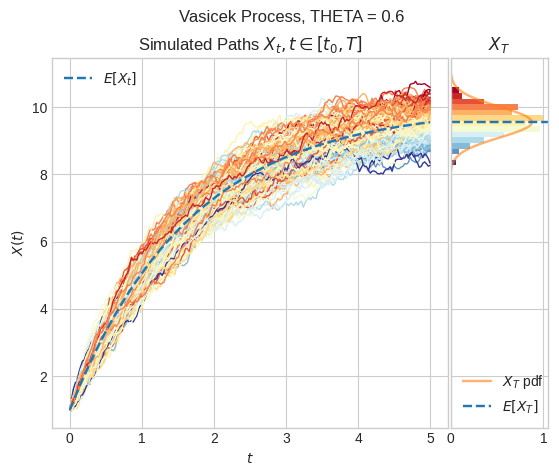

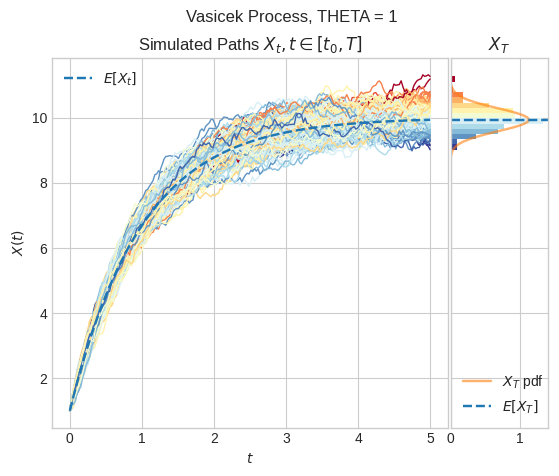

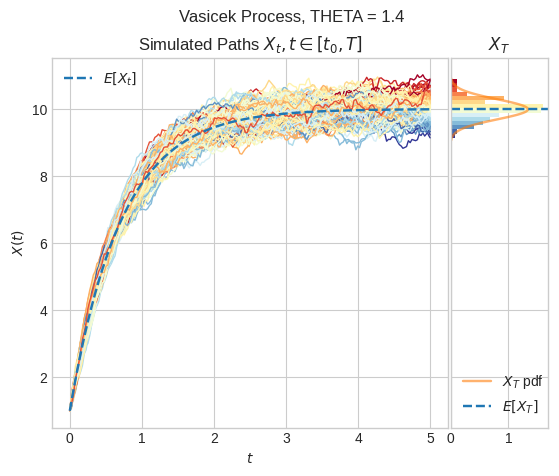

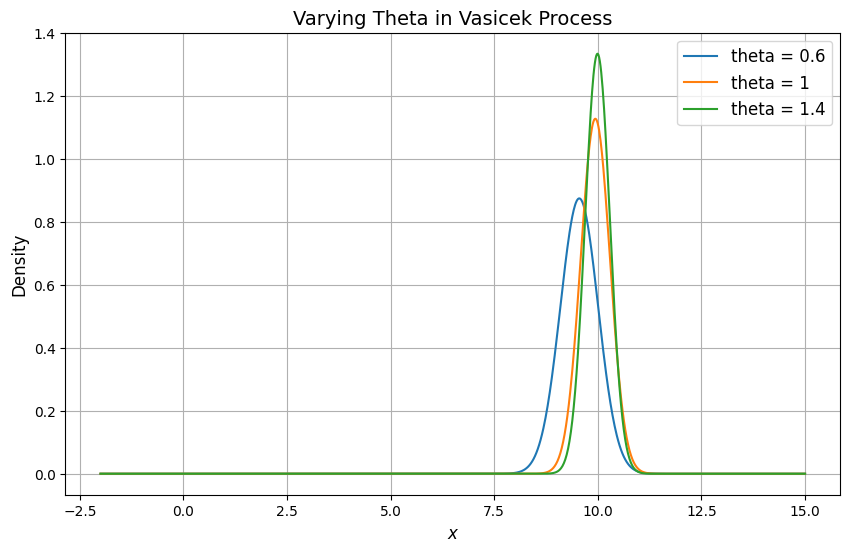

In [44]:
# THETA=1
# MU=10
# SIGMA=0.5
# INITIAL=1
# TIME=5
delt=0.4

for new in [THETA-THETA*delt, THETA, THETA+THETA*delt]:
    process = Vasicek(theta=new, mu=MU, sigma=SIGMA, initial=INITIAL, T=TIME)
    process.draw(n=200, N=200, envelope=False, title=f'Vasicek Process, THETA = {new}')

plot_varying_parameter("theta", delt, fixed_params)
plt.show()


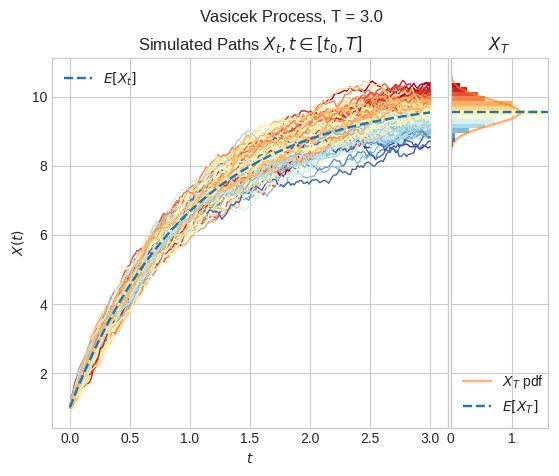

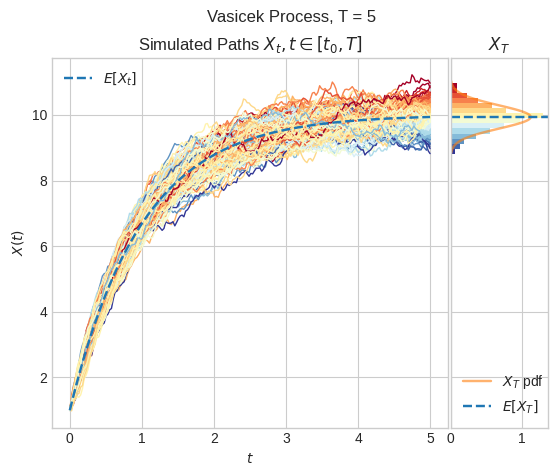

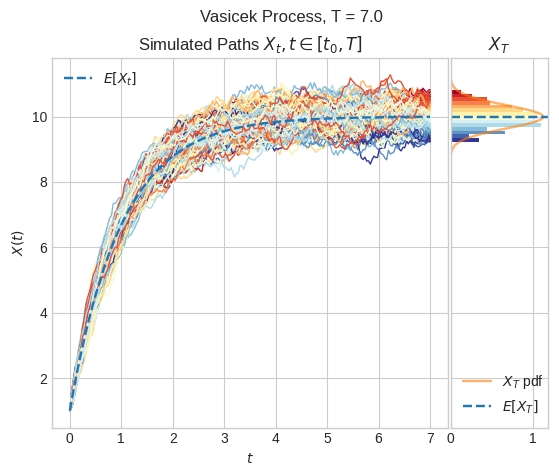

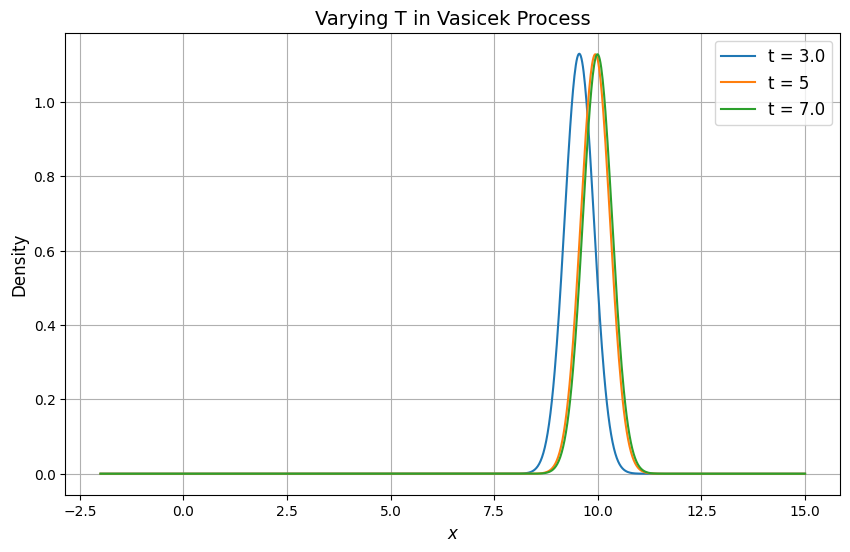

In [46]:
# THETA=1
# MU=10
# SIGMA=0.5
# INITIAL=1
# TIME=5
delt=0.4

for new in [TIME-TIME*delt, TIME, TIME+TIME*delt]:
    process = Vasicek(theta=THETA, mu=MU, sigma=SIGMA, initial=INITIAL, T=new)
    process.draw(n=200, N=200, envelope=False, title=f'Vasicek Process, T = {new}')

plot_varying_parameter("t", delt, fixed_params)
plt.show()


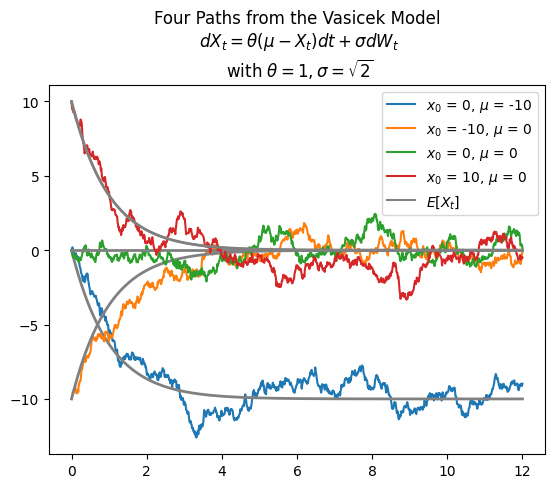

In [8]:
#from aleatory.processes import Vasicek
import matplotlib.pyplot as plt
import numpy as np

process = Vasicek(theta=1.0, mu=-10.0, sigma=np.sqrt(2), initial=0.0, T=12.0)
path = process.simulate(n=1000, N=1)
ts = process.times
exp = process.marginal_expectation(ts)
plt.plot(ts, path[0], label= f'$x_0$ = 0, $\mu$ = -10')
plt.plot(ts, exp, color='grey',linewidth=2)

for x0 in [-10.0, 0.0, 10.0]:
    process = Vasicek(theta=1.0, mu=0.0, sigma=np.sqrt(2), initial=x0, T=12.0)
    path = process.simulate(n=1000, N=1)
    plt.plot(ts, path[0], label= f'$x_0$ = {x0:.0f}, $\mu$ = 0')
    exp = process.marginal_expectation(ts)
    plt.plot(ts, exp, color='grey', linewidth=2)
plt.plot(ts, exp, color='grey', label=f'$E[X_t]$')
plt.legend()
plt.title('Four Paths from the Vasicek Model\n $dX_t = \\theta(\mu - X_t) dt + \sigma dW_t$\n with $\\theta = 1, \sigma = \sqrt{2}$')
plt.show()

**Simulation**

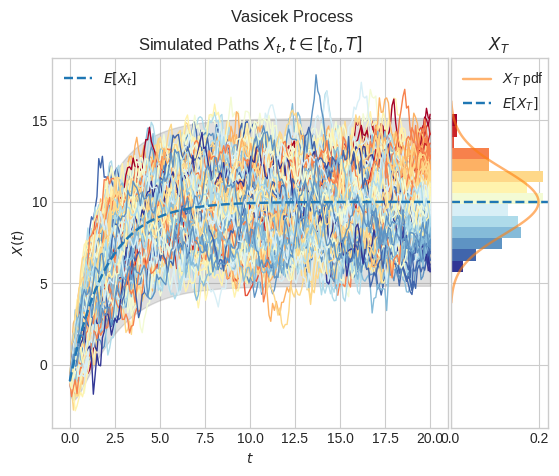

In [9]:
process = Vasicek(theta=0.5, mu=10.0, sigma=2.0, initial=-1.0, T=20.0)
fig = process.draw(n=200, N=200, envelope=True)

#### The parameter $\theta$ determines the Speed of Convergence

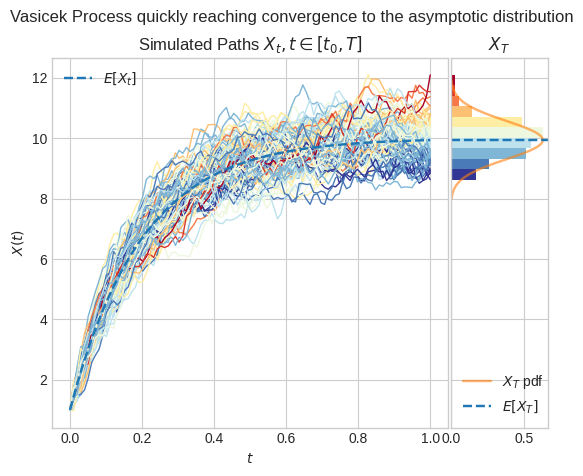

In [10]:
# from aleatory.processes import Vasicek
process = Vasicek(theta=5.0, mu=10.0, sigma=2.0, initial=1.0, T=1.0)
fig = process.draw(n=100, N=100, title='Vasicek Process quickly reaching convergence to the asymptotic distribution')

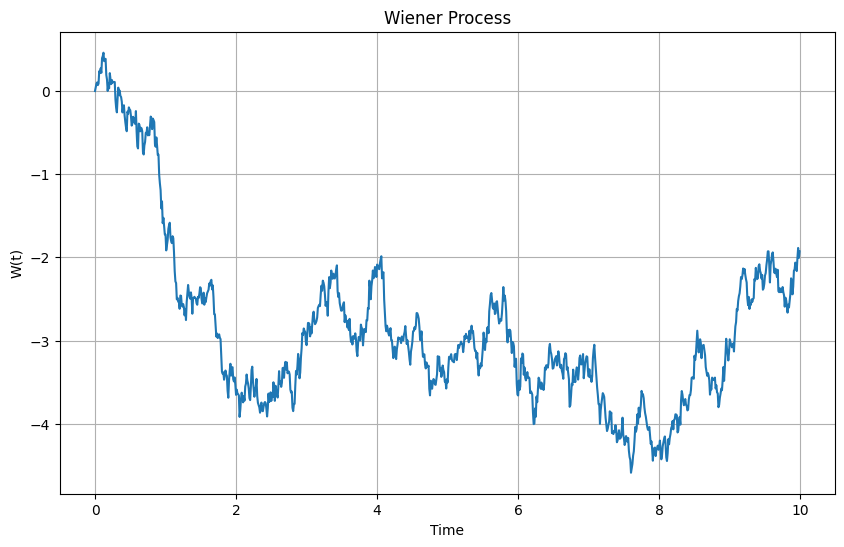

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_wiener_process(num_points, dt):
    # Generate the increments using normal distribution
    increments = np.random.normal(0, np.sqrt(dt), num_points - 1)

    # The Wiener process starts at zero, so we concatenate a 0 at the beginning
    W = np.concatenate([[0], np.cumsum(increments)])

    return W

# Simulation parameters
num_points = 1000
dt = 0.01

W = simulate_wiener_process(num_points, dt)

# Plotting the Wiener process
plt.figure(figsize=(10, 6))
plt.plot(np.arange(num_points) * dt, W)
plt.title('Wiener Process')
plt.xlabel('Time')
plt.ylabel('W(t)')
plt.grid(True)
plt.show()

#Plot different no. of paths by varying parameter and time interval!